In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Nacitanie iris datasetu
# X - features
# y - triedy
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
print("Dataset shape:", X.shape)
print("Labels:", set(y))
print("Classes:", iris['target_names'])

Dataset shape: (150, 4)
Labels: {0, 1, 2}
Classes: ['setosa' 'versicolor' 'virginica']


In [4]:
# Rozdelenie datasetu na trenovaciu a testovaciu cast
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Vizualizacia datasetu
def create_scatter_plot(X, y, features, title):
    # Set up the figure and axis
    plt.figure(figsize=(12, 10))
    plt.suptitle(title, fontsize=16)

    # Create a scatter plot for each pair of features
    plot_number = 1
    for i in range(len(features)):
        for j in range(len(features)):
            if i < j:
                plt.subplot(2, 3, plot_number)
                for target in np.unique(y):
                    subset = X[y == target]
                    plt.scatter(subset[:, i], subset[:, j], label=iris.target_names[target])
                plt.xlabel(features[i])
                plt.ylabel(features[j])
                plt.legend()
                plot_number += 1

    plt.show()

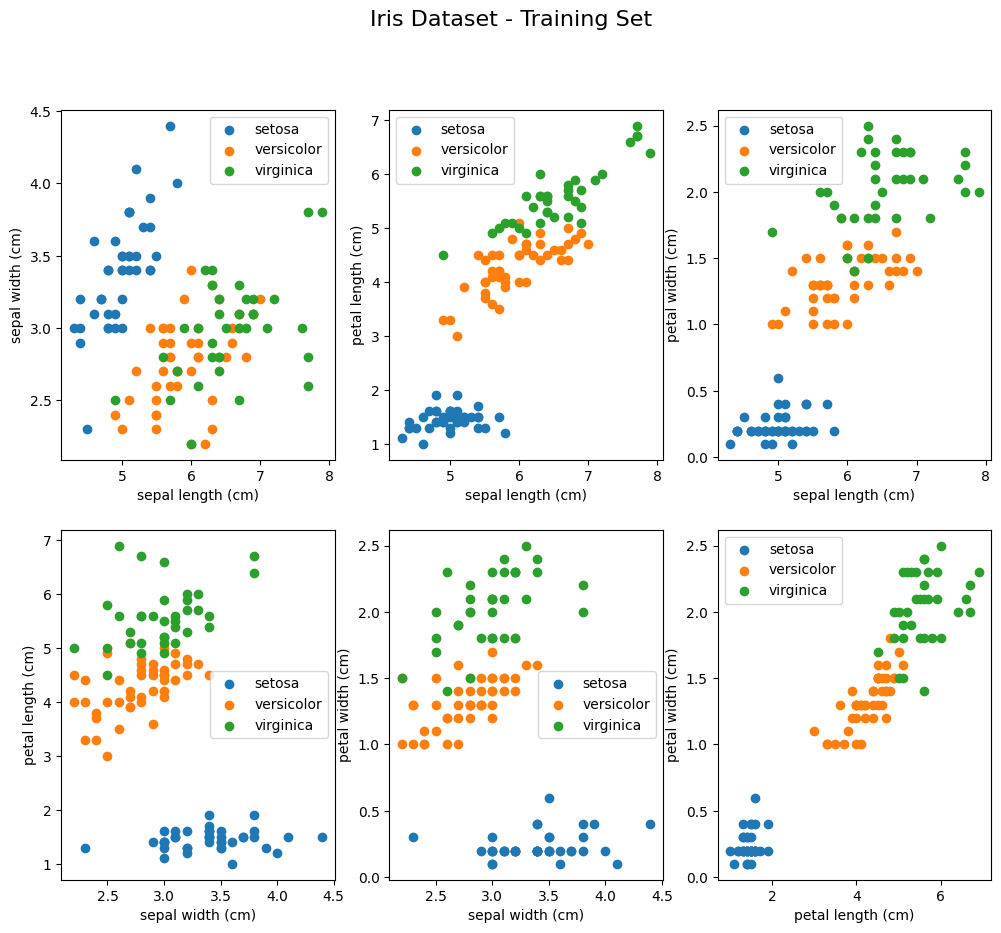

In [6]:
# Vizualizacia trenovacieho setu
create_scatter_plot(X_train, y_train, iris.feature_names, 'Iris Dataset - Training Set')

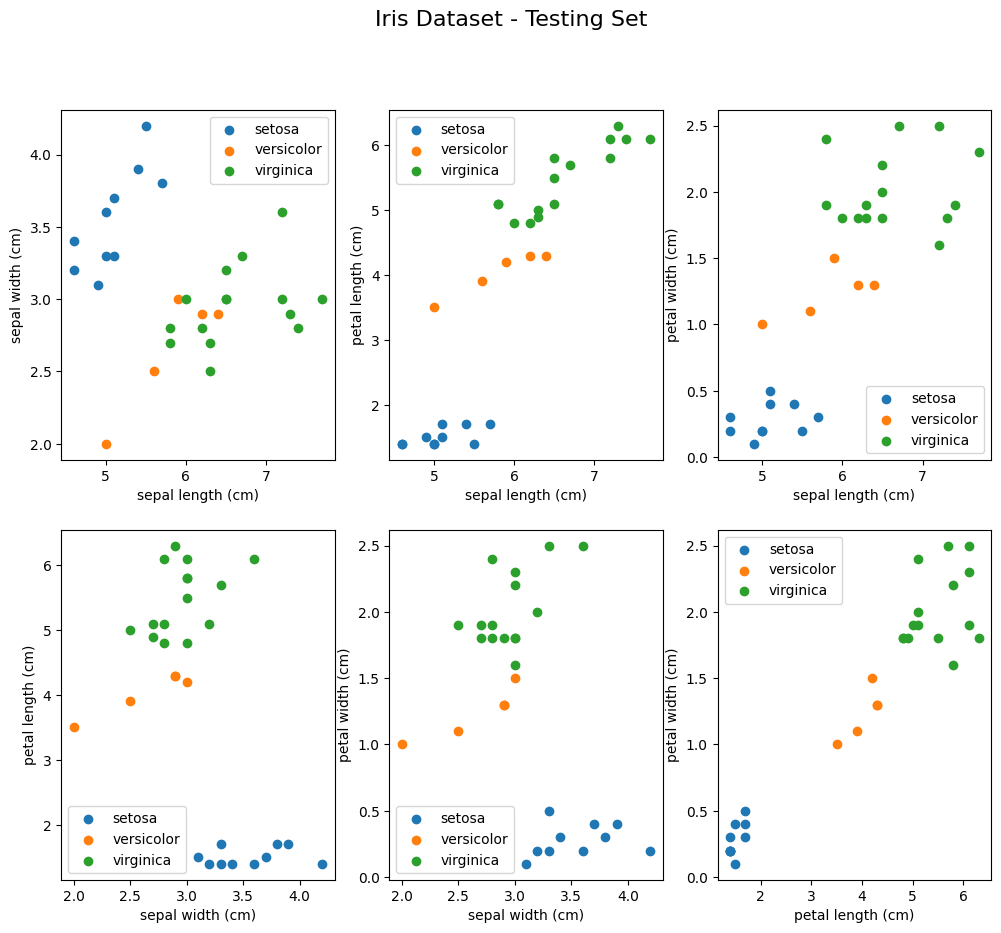

In [7]:
# Vizualizacia testovacieho setu
create_scatter_plot(X_test, y_test, iris.feature_names, 'Iris Dataset - Testing Set')

In [8]:
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [10]:
# Create data loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [11]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()

        # First hidden layer
        self.fc1 = nn.Linear(4, 10) # 4 input features, 10 neurons in the first hidden layer
        # Second hidden layer
        self.fc2 = nn.Linear(10, 10) # 10 neurons in the second hidden layer
        # Output layer
        self.fc3 = nn.Linear(10, 3) # 3 output classes

        # Rectified linear unit
        self.relu = nn.ReLU()

    def forward(self, x):
        # Apply ReLU activation function after each hidden layer
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        # No activation function is applied at the output layer here
        # This will be done later in combination with the loss function
        x = self.fc3(x)
        return x

In [12]:
model = Classifier()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
# Training loop
for epoch in range(100):
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 1, Loss: 1.222421646118164
Epoch 2, Loss: 1.1242988109588623
Epoch 3, Loss: 1.0542738437652588
Epoch 4, Loss: 1.0112988948822021
Epoch 5, Loss: 1.0750068426132202
Epoch 6, Loss: 1.0478442907333374
Epoch 7, Loss: 0.9952418208122253
Epoch 8, Loss: 0.9643532633781433
Epoch 9, Loss: 0.9293746948242188
Epoch 10, Loss: 1.0031404495239258
Epoch 11, Loss: 0.9837296009063721
Epoch 12, Loss: 0.8991819620132446
Epoch 13, Loss: 0.8457900881767273
Epoch 14, Loss: 0.880344569683075
Epoch 15, Loss: 0.7238957285881042
Epoch 16, Loss: 0.735366940498352
Epoch 17, Loss: 0.7485034465789795
Epoch 18, Loss: 0.7879834175109863
Epoch 19, Loss: 0.5131771564483643
Epoch 20, Loss: 0.5024008750915527
Epoch 21, Loss: 0.6318843364715576
Epoch 22, Loss: 0.6358609199523926
Epoch 23, Loss: 0.6961087584495544
Epoch 24, Loss: 0.6865119338035583
Epoch 25, Loss: 0.4993857741355896
Epoch 26, Loss: 0.5922861695289612
Epoch 27, Loss: 0.6295406818389893
Epoch 28, Loss: 0.480241596698761
Epoch 29, Loss: 0.583848118782043

In [14]:
def evaluate_model(model, data_loader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [15]:
accuracy = evaluate_model(model, test_loader)
print(f'Accuracy: {accuracy}%')

sample_inputs = torch.tensor([[5.1, 3.5, 1.4, 0.2], [6.7, 3.0, 5.2, 2.3]], dtype=torch.float32)
sample_inputs = scaler.transform(sample_inputs)  # Apply the same scaling as the training data
sample_inputs = torch.tensor(sample_inputs, dtype=torch.float32)

model.eval()
with torch.no_grad():
    sample_outputs = model(sample_inputs)
    _, predicted = torch.max(sample_outputs, 1)
print("Predictions:", predicted.numpy())

Accuracy: 100.0%
Predictions: [0 2]
